## Exercícios

1. Aplique HDR a alguma imagem de https://hdr-photographer.com/hdr-photos-to-play-with/.

C:\Users\izalo\AppData\Local\Temp\ipykernel_7452\1872789718.py:21: RuntimeWarning: invalid value encountered in divide
  img_mapped[:,:,i] = img[:,:,i] * (L_mapped / L)
C:\Users\izalo\AppData\Local\Temp\ipykernel_7452\1872789718.py:35: RuntimeWarning: invalid value encountered in cast
  trator_hdr = (res * 255).astype(np.uint8)


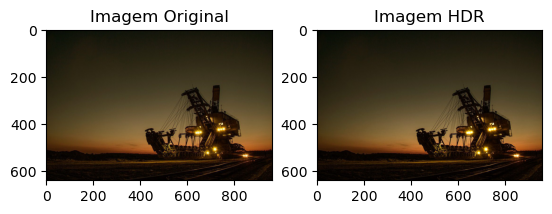

In [30]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def reinhard_hdr(img, alpha=0.18, beta=0.85, intensity=1):
    # Calculando a luminância média da imagem
    L = img.mean(axis=2)
    
    # Calculando o valor da luminância máximo que será considerado como branco
    L_white = np.percentile(L, 100 - intensity)
    
    # Aplicando o mapeamento de tons de Reinhard para ajustar a luminância
    L_mapped = L * (1 + alpha * (L / (L_white ** 2)))
    L_mapped /= 1 + alpha * L
    
    # Inicializando uma matriz vazia com as mesmas dimensões da imagem original
    img_mapped = np.zeros_like(img)
    
    # Aplicando o mapeamento de tons para cada canal de cor
    for i in range(3):
        img_mapped[:,:,i] = img[:,:,i] * (L_mapped / L)
    
    # Clip para garantir que os valores estejam dentro do intervalo [0, 1]
    img_mapped = np.clip(img_mapped * beta, 0, 1)
    
    return img_mapped


trator = np.array(Image.open('trator.jpg'))

img_float = trator.astype(np.float32) / 255.0

res = reinhard_hdr(img_float)

trator_hdr = (res * 255).astype(np.uint8)

# Exibir a imagem original e a imagem HDR
plt.subplot(2, 2, 1)
plt.imshow(trator)
plt.title('Imagem Original')

plt.subplot(2, 2, 2)
plt.imshow(trator_hdr)
plt.title('Imagem HDR')
plt.show()


2. Crie uma função `blend`, que recebe como parâmetros `img1`, `img2` e `c`, que realiza uma operação de blending entre duas imagens e retorna a imagem resultante. Em seguida, busque duas imagens **de mesmo tamanho** e realize um blending, com coeficiente de sua escolha.

Text(0.5, 1.0, 'Imagem blending:')

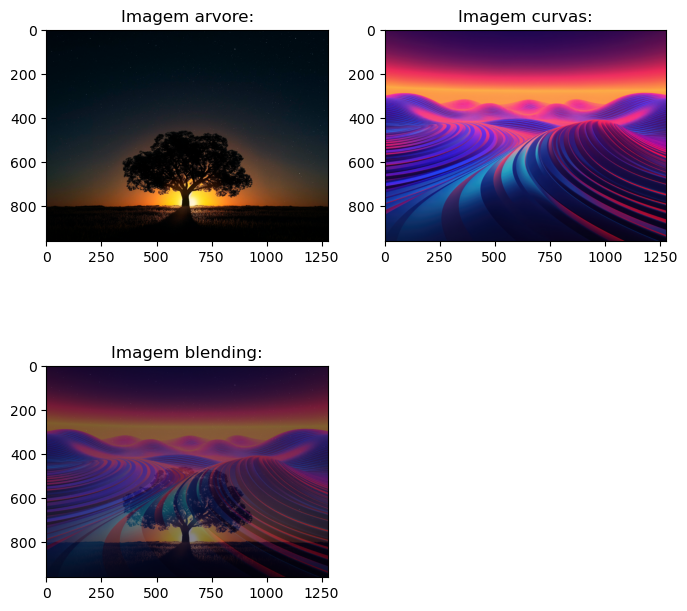

In [14]:
# Carregar a imagem original
arvore = np.array(Image.open('arvore.png'))
curvas = np.array(Image.open('curvas.png'))

def blend(img1,img2, c):
    blend_img = (c* img1) + ((1 - c) * img2)
    blend_img = blend_img.astype(np.uint8)
    
    return blend_img

resultado = blend(arvore,curvas,0.5)

plt.figure(figsize=(8,8))

plt.subplot(2, 2, 1)
plt.imshow(arvore)
plt.title('Imagem arvore:')

plt.subplot(2, 2, 2)
plt.imshow(curvas)
plt.title('Imagem curvas:')

plt.subplot(2, 2, 3)
plt.imshow(resultado)
plt.title('Imagem blending:')


3. Aumente (ou diminua, caso prefira) a iluminação da imagem gerada acima. Salve o resultado no disco.

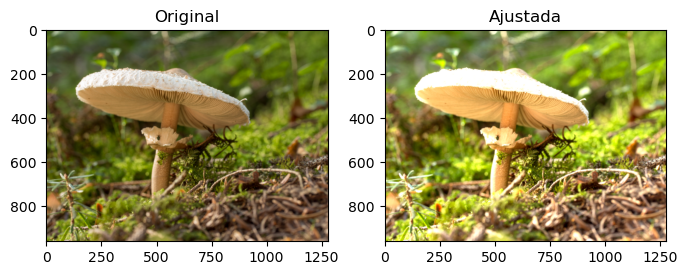

In [32]:
def ajusta_bright(img, factor):
    # Obtendo as dimensões da imagem:
    (l, c, p) = img.shape
    
    # Criando uma matriz de zeros com as mesmas dimensões da imagem
    res = np.zeros(shape=img.shape, dtype=np.float32)

    # Ajustar a iluminação multiplicando pelo fator de escala
    img_ajustada = img.astype(np.float32) * factor

    # Clip para garantir que os valores estejam dentro do intervalo [0, 255]
    img_ajustada = np.clip(img_ajustada, 0, 255)

    # Converter de volta para uint8
    img_bright = img_ajustada.astype(np.uint8)

    return img_bright

cogumelo = np.array(Image.open('cogumelo.png'))

# Chamando a função ajusta_bright para ajustar a iluminação: 
# factor > 1 = aumenta a iluminação
# 0 < factor < 1 = diminui a iluminação
cogumelo_iluminado = ajusta_bright(cogumelo, 1.5)

# Exibir a imagem original e a imagem ajustada
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.imshow(cogumelo)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(cogumelo_iluminado)
plt.title('Ajustada')

# Salvando imagem ajustada:
Image.fromarray(cogumelo_iluminado).save("cogumelo_iluminado.png")